In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

warnings.filterwarnings("ignore")

In [2]:
file_path = "data/weatherAUS.csv"

df = pd.read_csv(file_path)

display(df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
# Loại bỏ các cột object không cần thiết
columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df.drop(columns=columns_to_drop, inplace=True)

display(df)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
df.shape

(145460, 18)

In [7]:
# Sử dụng phương thức isna() hoặc isnull() để kiểm tra giá trị null hoặc NaN
null_counts = df.isnull().sum() + df.isna().sum()

# Hiển thị số lượng giá trị null trong mỗi cột
print(null_counts)

MinTemp            2970
MaxTemp            2522
Rainfall           6522
Evaporation      125580
Sunshine         139670
WindGustSpeed     20526
WindSpeed9am       3534
WindSpeed3pm       6124
Humidity9am        5308
Humidity3pm        9014
Pressure9am       30130
Pressure3pm       30056
Cloud9am         111776
Cloud3pm         118716
Temp9am            3534
Temp3pm            7218
RainToday          6522
RainTomorrow       6534
dtype: int64


In [8]:
# Loại bỏ các dòng chứa giá trị null
df.dropna(inplace=True)

# Hiển thị thông tin của DataFrame sau khi loại bỏ dòng null
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 58090 entries, 6049 to 142302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        58090 non-null  float64
 1   MaxTemp        58090 non-null  float64
 2   Rainfall       58090 non-null  float64
 3   Evaporation    58090 non-null  float64
 4   Sunshine       58090 non-null  float64
 5   WindGustSpeed  58090 non-null  float64
 6   WindSpeed9am   58090 non-null  float64
 7   WindSpeed3pm   58090 non-null  float64
 8   Humidity9am    58090 non-null  float64
 9   Humidity3pm    58090 non-null  float64
 10  Pressure9am    58090 non-null  float64
 11  Pressure3pm    58090 non-null  float64
 12  Cloud9am       58090 non-null  float64
 13  Cloud3pm       58090 non-null  float64
 14  Temp9am        58090 non-null  float64
 15  Temp3pm        58090 non-null  float64
 16  RainToday      58090 non-null  object 
 17  RainTomorrow   58090 non-null  object 
dtypes: floa

In [9]:
df.shape

(58090, 18)

In [10]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
# Chuyển đổi các giá trị 'No' thành 0 và 'Yes' thành 1
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

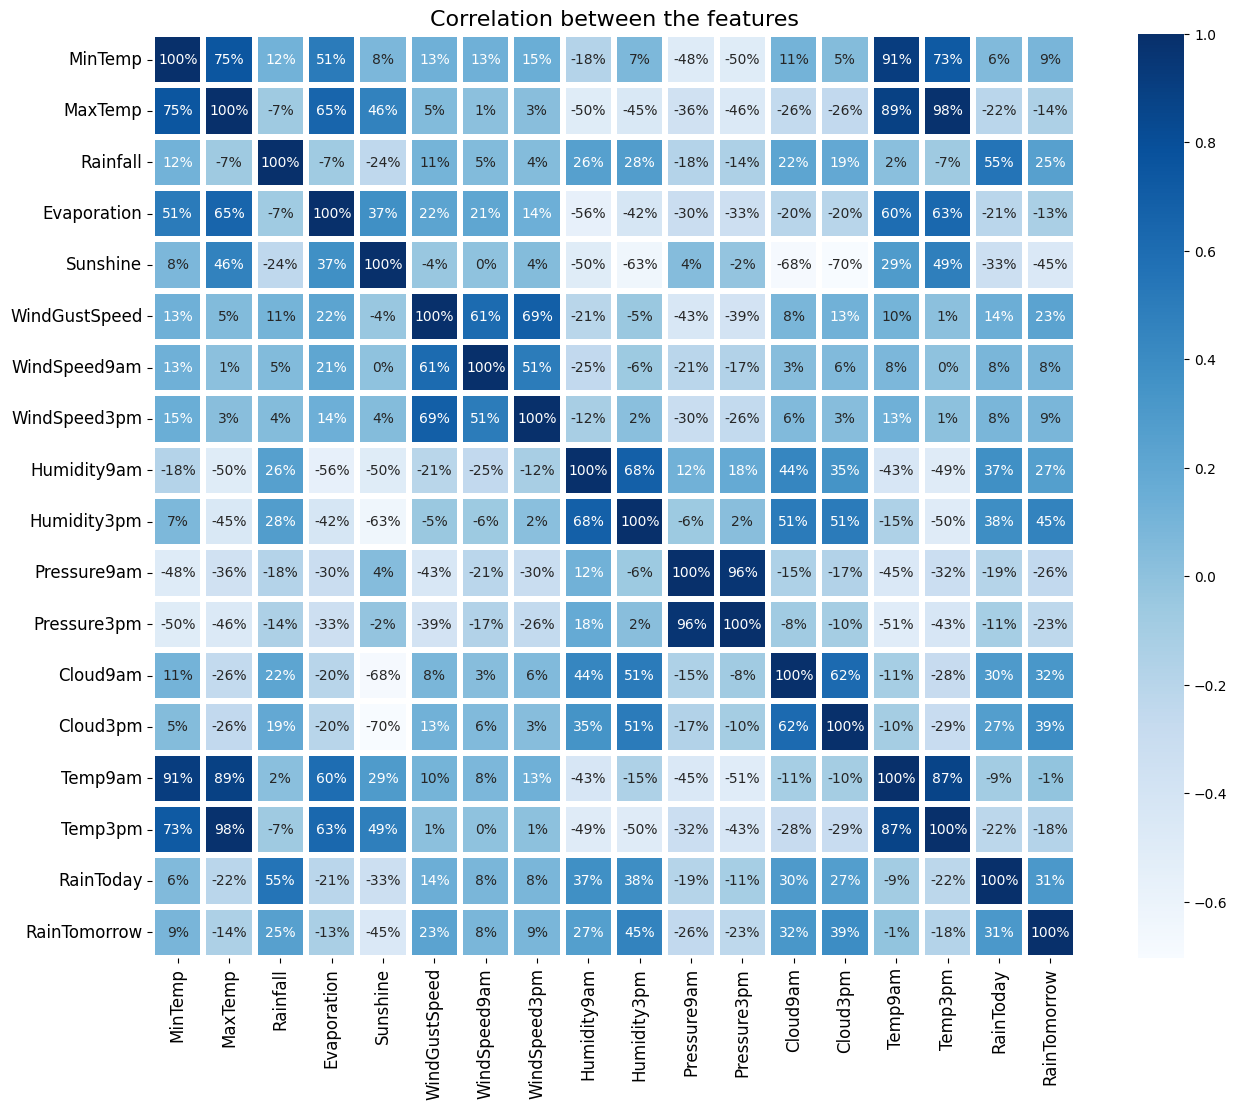

In [12]:
fig=plt.figure(figsize=(16,12))
axis=sns.heatmap(df.corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16);
axis.set_xticklabels(df, fontsize=12)
axis.set_yticklabels(df, fontsize=12, rotation=0);

> #### Strong correlation between

`Temp3pm` and `MaxTemp`

`Pressure3pm` and `Pressure9am`

`Temp9am` and `MinTemp`

`Temp9am` and `MaxTemp`

`Temp3pm` and `Temp9am`

> We will remove one of the features in each pair, to avoid multicollinearity

In [13]:
columns_to_drop = ['Temp3pm', 'Pressure3pm', 'Temp9am']
df.drop(columns=columns_to_drop, inplace=True)

display(df)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,2.0,5.0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1.0,1.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1.0,6.0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1.0,5.0,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1.0,6.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,0.0,1.0,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,7.0,0.0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,0.0,0.0,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1.0,1.0,0,0


# Predict

In [14]:
# Chia dữ liệu thành features và target
X_predict = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
        'Humidity3pm', 'Pressure9am', 'Cloud3pm',
        'RainToday', 'RainTomorrow']]
y_predict = df['Cloud9am']

In [15]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_predict = scaler.fit_transform(X_predict)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_predict, X_test_predict, y_train_predict, y_test_predict = train_test_split(X_predict, y_predict, test_size=0.2, random_state=42)

In [16]:
model = Sequential()

# Thêm các lớp Dense vào mô hình
model.add(Dense(units=64, activation='relu', input_shape=(X_train_predict.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='relu'))  # Lớp đầu ra với activation là 'sigmoid' cho bài toán phân loại nhị phân

# Compile mô hình
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fitting the FNN to the Training set
model.fit(X_train_predict, y_train_predict, epochs=50, verbose=1)


Epoch 1/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 2s 652us/step - accuracy: 0.1847 - loss: 8.2248
Epoch 2/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.1889 - loss: 4.4924
Epoch 3/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.1908 - loss: 4.1427
Epoch 4/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.1924 - loss: 3.9050
Epoch 5/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.1964 - loss: 3.8414
Epoch 6/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.1977 - loss: 3.7210
Epoch 7/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.1958 - loss: 3.6449
Epoch 8/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.2019 - loss: 3.5605
Epoch 9/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.2005 - loss: 3.5334
Epoch 10/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.2028 - loss: 3.5730
Epoch 11/50
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.2055 - loss: 3.5235
Epoch 12

In [17]:
# Đánh giá mô hình trên tập dữ liệu kiểm tra
loss, accuracy = model.evaluate(X_test_predict, y_test_predict)
print(f"Loss trên tập kiểm tra: {loss}")
print(f"Độ chính xác trên tập kiểm tra: {accuracy}")

print(model.summary())

364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.2075 - loss: 3.0711
Loss trên tập kiểm tra: 3.0839333534240723
Độ chính xác trên tập kiểm tra: 0.21225684881210327


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,172 (28.02 KB)

None


# Classifi

In [18]:
# Chia dữ liệu thành features và target
X_classifi = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
        'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm',
        'RainToday']]
y_classifi = df['RainTomorrow']

In [19]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_classifi = scaler.fit_transform(X_classifi)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_classifi, X_test_classifi, y_train_classifi, y_test_classifi = train_test_split(X_classifi, y_classifi, test_size=0.2, random_state=42)

In [20]:
# Tạo mô hình FNN
model = Sequential()

# Thêm các lớp Dense vào mô hình
model.add(Dense(units=64, activation='relu', input_shape=(X_train_classifi.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))  # Lớp đầu ra với activation là 'sigmoid' cho bài toán phân loại nhị phân

# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train_classifi, y_train_classifi, epochs=50, batch_size=32, validation_split=0.2)

# Đánh giá mô hình trên dữ liệu kiểm tra
loss, accuracy = model.evaluate(X_test_classifi, y_test_classifi)
print(f"Loss trên dữ liệu kiểm tra: {loss}")
print(f"Độ chính xác trên dữ liệu kiểm tra: {accuracy}")

Epoch 1/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.7952 - loss: 0.4409 - val_accuracy: 0.8567 - val_loss: 0.3346
Epoch 2/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.8482 - loss: 0.3565 - val_accuracy: 0.8542 - val_loss: 0.3325
Epoch 3/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8451 - loss: 0.3582 - val_accuracy: 0.8563 - val_loss: 0.3263
Epoch 4/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.8510 - loss: 0.3522 - val_accuracy: 0.8565 - val_loss: 0.3272
Epoch 5/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8535 - loss: 0.3462 - val_accuracy: 0.8576 - val_loss: 0.3265
Epoch 6/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8521 - loss: 0.3432 - val_accuracy: 0.8577 - val_loss: 0.3229
Epoch 7/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.8503 - loss: 0.3416 - val_accuracy: 0.8588 - val_loss: 0.3232
Epoch 8/50
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8524 -